In [1]:
import tweepy
import csv
from tweepy import OAuthHandler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
tweets_df = pd.read_csv('Election.csv',names=['Fecha','nickname','nombre_usuario','ciudad_actual','coordenadas','sitio','numero_retweet','contador_favorito','texto'],delimiter="|")

In [ ]:
tweets_df.head()

,Fecha,nickname,nombre_usuario,ciudad_actual,coordenadas,sitio,numero_retweet,contador_favorito,texto
0,2020-11-07 17:23:02,Niggercheikhou,Nℹ️gger Ⓜ️🗣 (Sniper)🇸🇳,Dakar,NaN,NaN,0,0,JOE BIDEN 77 ans New President 46emeSenateur a...
1,2020-11-07 17:23:02,HansTenk,Hans Tenk,Nijmegen,NaN,NaN,0,0,Everybody rejoice! #PresidentElectJoeBiden #Tr...
2,2020-11-07 17:23:02,ELewald,E. Lewald,NaN,NaN,NaN,2228,0,RT @Reuters: Democrat Joe Biden wins #Election...
3,2020-11-07 17:23:02,GuevaraGus11,Gustavo Guevara 🇨🇴,"Washington, DC",NaN,NaN,109,0,RT @argilacarlos: Good Bye Trump. #Election202...
4,2020-11-07 17:23:02,cmocg20,dann,NaN,NaN,NaN,6,0,RT @The_ChrisShaw: @ThatTimWalker Awaiting see...


In [4]:
tweets_df.dtypes

Fecha                 object
nickname              object
nombre_usuario        object
ciudad_actual         object
coordenadas          float64
sitio                 object
numero_retweet         int64
contador_favorito      int64
texto                 object
dtype: object

In [5]:
tweets_df.groupby(["nombre_usuario"])["numero_retweet"].sum().nlargest(10).reset_index()

,nombre_usuario,numero_retweet
0,Nick Greene,67845
1,𝖍 𝖆 𝖓 𝖓 𝖆𝖍 𝖑 𝖔 𝖚 𝖎 𝖘 𝖊.🎃,67841
2,𝔧𝔞𝔠𝔢𝔫 🦋,67825
3,𝔪𝔬𝔩𝔩𝔦 𝔧𝔞𝔯𝔞𝔪𝔦𝔩𝔩𝔬,67825
4,Heaven Smith,67823
5,ɪɴ生 || ot8 forever #BLM,29748
6,Psalm1USA,29742
7,keshav agarwal,23478
8,Puttipong,15737
9,eizlan,15737


In [6]:
text = tweets_df.texto[99]
text

'RT @lwtzdancw: Kamala Harris is the first woman in history to be elected Vice president of the united statesPOWER YESS#Election2020 htt…'

In [8]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

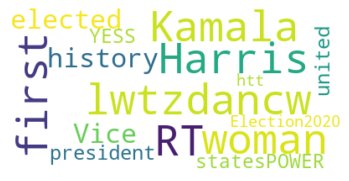

In [9]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [10]:
text = " ".join(review for review in tweets_df.texto)
print ("Hay {} palabras en la combinación de todos los tuits.".format(len(text)))

Hay 11631 palabras en la combinación de todos los tuits.


In [11]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(RT)", "", txt).split())

In [12]:
import re

In [13]:
text=remove_url(text)

In [14]:
text

'JOE BIDEN 77 ans New President 46emeSenateur a 29 ans La vie ne lui a pas toujours fait cadeaux Ce gars vie Everybody rejoice PresidentElectJoeBiden TrumpLosing Election2020 Reuters Democrat Joe Biden wins Election2020 argilacarlos Good Bye Trump Election2020 TheChrisShaw ThatTimWalker Awaiting seeing Johnsons fake delight at the great news Election2020 intoactionus CONGRATULATIONS TO AMERICAS 46TH PRESIDENT JoeBiden amp VICE PRESIDENT KamalaHarris PresidentBiden VicePresidentHarris mduggan10 Congrats to the new administration My hope is we can unite this country and its people let the hate finally stop One clown gone Well done America for voting in an adult to become President Election2020 One more clown to go BorisOut If seeing a man of Rudy Giulianis calibre talking absolute bollocks on a podium for the world to laugh at doesnt ABCWorldNews Joe Biden Never forget the tallies arent just numbersthey represent votes and voters Men and women who exercise the thehill Van Jones gets emot

In [15]:
stopwords = set(STOPWORDS)
stopwords.update(["https", "at", "the", "to", "on","for","ans","la","a","mcdc_mcdc","RT","lui","ne","de", "PST", "htt"])

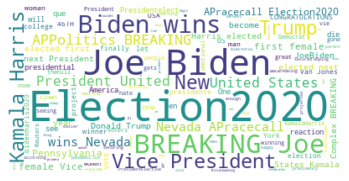

In [16]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
from textblob import TextBlob

In [18]:
def clean_tweet(tweet): 
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 

In [19]:
def get_tweet_sentiment(tweet):
        analysis = TextBlob(tweet)
        language = analysis.detect_language()
        if language == 'en':
            analysis_ready = analysis
        else:
            analysis_ready = analysis.translate(to='en')
            
        if analysis_ready.sentiment.polarity > 0: 
            return 'positive'
        elif analysis_ready.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'

In [20]:
text = tweets_df.texto[0]
blob_obj = TextBlob(text)
blob_obj.detect_language()
blob_obj.translate(to="en")

TextBlob("JOE BIDEN 77 years old New President 46th Senator at 29 years old. Life has not always given him gifts. This guy lives… https://t.co/qa7JKMBys0")

In [21]:
tweets_df["Sentimientos"] = tweets_df["texto"].apply(get_tweet_sentiment)

In [22]:
tweets_df

,Fecha,nickname,nombre_usuario,ciudad_actual,coordenadas,sitio,numero_retweet,contador_favorito,texto,Sentimientos
0,2020-11-07 17:23:02,Niggercheikhou,Nℹ️gger Ⓜ️🗣 (Sniper)🇸🇳,Dakar,NaN,NaN,0,0,JOE BIDEN 77 ans New President 46emeSenateur a...,positive
1,2020-11-07 17:23:02,HansTenk,Hans Tenk,Nijmegen,NaN,NaN,0,0,Everybody rejoice! #PresidentElectJoeBiden #Tr...,neutral
2,2020-11-07 17:23:02,ELewald,E. Lewald,NaN,NaN,NaN,2228,0,RT @Reuters: Democrat Joe Biden wins #Election...,positive
3,2020-11-07 17:23:02,GuevaraGus11,Gustavo Guevara 🇨🇴,"Washington, DC",NaN,NaN,109,0,RT @argilacarlos: Good Bye Trump. #Election202...,positive
4,2020-11-07 17:23:02,cmocg20,dann,NaN,NaN,NaN,6,0,RT @The_ChrisShaw: @ThatTimWalker Awaiting see...,positive
...,...,...,...,...,...,...,...,...,...,...
95,2020-11-07 17:23:01,HotDogWhater,Based necter,Yourmomgay,NaN,NaN,2290,0,RT @aubrey_huff: This is my serious prediction...,negative
96,2020-11-07 17:23:01,Awkwardjokester,J Smith,"Indianapolis, IN",NaN,NaN,0,0,290 and counting!❤️#Election2020 https://t.co/...,neutral
97,2020-11-07 17:23:01,_markfranklin,Mark Franklin,"New York, NY",NaN,Place(_api=<tweepy.api.API object at 0x000001F...,0,0,#Election2020@CNN @NBCNews @FoxNews @CBSNews h...,neutral
98,2020-11-07 17:23:01,amirruulll,amirruulll,Kuala Lumpur,NaN,NaN,2675,0,RT @AP_Politics: BREAKING: Joe Biden wins Neva...,positive


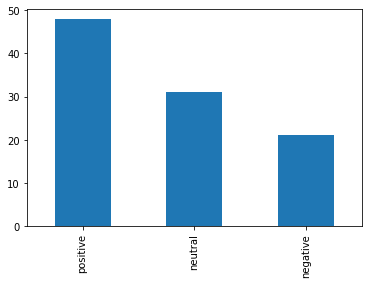

In [23]:
tweets_df["Sentimientos"].value_counts().plot(kind='bar')